In [ ]:
!pip install mne

     |████████████████████████████████| 7.4 MB 7.7 MB/s 


In [ ]:
pip install mne-features

     |████████████████████████████████| 40 kB 3.4 MB/s 
  Created wheel for mne-features: filename=mne_features-0.2-py3-none-any.whl size=26760 sha256=9e797f104f0c0f94a4a0819549bea3351086d55f2580750a42f6d8883e1e584c
  Stored in directory: /root/.cache/pip/wheels/50/7d/94/905a24736d6d8ecd07fb249d02af5391afed5054d26a0b66b8
Successfully built mne-features


In [ ]:
pip install numpy matplotlib scipy numba scikit-learn mne PyWavelets pandas

In [ ]:
pip install git+https://github.com/mne-tools/mne-features.git#egg=mne_features

  Cloning https://github.com/mne-tools/mne-features.git to /tmp/pip-install-a9vap9uv/mne-features_d6964acc9cc7431f9633df838edd628f
  Running command git clone -q https://github.com/mne-tools/mne-features.git /tmp/pip-install-a9vap9uv/mne-features_d6964acc9cc7431f9633df838edd628f


In [ ]:
pip install antropy

     |████████████████████████████████| 49 kB 4.0 MB/s 
  Created wheel for antropy: filename=antropy-0.1.4-py3-none-any.whl size=16159 sha256=3b47ab1b0e0678fe9c00fd4e5b0f377972870ebfc2267c72fce7a8645536edb6
  Stored in directory: /root/.cache/pip/wheels/d4/cc/6b/28fa7036bdabc6f1f92fd6a108ae259dbb48f107f676d6b491
Successfully built antropy


In [ ]:
import numpy as np 
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.model_selection import train_test_split
import fastdtw
#dtw for comparing two sequences and calculating the optimal matchinh between two sequences
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.signal import butter, lfilter, freqz, boxcar
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, euclidean_distances
from scipy.fftpack import fft, ifft
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_data = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_data.csv")
train_data_event = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_events.csv")
test_data = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/test/subj1_series10_data.csv")
test_data_event = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/test/subj1_series9_data.csv")

In [ ]:
train_complete = pd.concat([train_data,train_data_event], axis=1)
train_complete.insert(0, "order", range(0, len(train_complete)))
train_complete

,order,id,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,C3,Cz,C4,T8,TP9,CP5,CP1,CP2,CP6,TP10,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10,id,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,0,subj1_series1_0,-31,363,211,121,211,15,717,279,35,158,543,-166,192,230,573,860,128,59,272,473,325,379,536,348,383,105,607,289,459,173,120,704,subj1_series1_0,0,0,0,0,0,0
1,1,subj1_series1_1,-29,342,216,123,222,200,595,329,43,166,495,-138,201,233,554,846,185,47,269,455,307,368,529,327,369,78,613,248,409,141,83,737,subj1_series1_1,0,0,0,0,0,0
2,2,subj1_series1_2,-172,278,105,93,222,511,471,280,12,177,534,-163,198,207,542,768,145,52,250,452,273,273,511,319,355,66,606,320,440,141,62,677,subj1_series1_2,0,0,0,0,0,0
3,3,subj1_series1_3,-272,263,-52,99,208,511,428,261,27,180,525,-310,212,221,542,808,115,41,276,432,258,241,521,336,356,71,568,339,437,139,58,592,subj1_series1_3,0,0,0,0,0,0
4,4,subj1_series1_4,-265,213,-67,99,155,380,476,353,32,165,507,-320,242,230,545,865,180,89,288,444,275,275,550,324,346,76,547,343,446,171,67,581,subj1_series1_4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119491,119491,subj1_series1_119491,478,520,377,172,141,118,-123,626,70,40,9,-95,73,-89,233,292,-85,-38,74,-34,2,-305,383,85,-1,444,337,-255,160,-121,-285,-178,subj1_series1_119491,0,0,0,0,0,0
119492,119492,subj1_series1_119492,439,450,298,185,128,502,-331,593,30,54,256,-224,49,-99,264,304,-210,-59,63,-19,10,-283,334,61,-8,427,322,-310,107,-152,-295,-178,subj1_series1_119492,0,0,0,0,0,0
119493,119493,subj1_series1_119493,363,370,278,239,124,768,-410,527,16,72,253,-394,35,-134,241,104,-164,-52,45,-45,16,-185,303,53,-24,438,368,-134,187,-99,-269,-121,subj1_series1_119493,0,0,0,0,0,0
119494,119494,subj1_series1_119494,281,298,318,257,130,736,-556,542,29,67,184,-260,42,-112,232,-168,-119,-30,54,-51,26,-177,341,50,-25,444,348,-135,181,-122,-290,-77,subj1_series1_119494,0,0,0,0,0,0


In [ ]:
df = pd.DataFrame(train_complete)
new_data = df.drop(['id','Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7','T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P8', 'PO9','O1','Oz','O2','O2','PO10'], axis = 1)
new_data

,order,C3,Cz,C4,P3,Pz,P4,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,0,192,230,573,348,383,105,0,0,0,0,0,0
1,1,201,233,554,327,369,78,0,0,0,0,0,0
2,2,198,207,542,319,355,66,0,0,0,0,0,0
3,3,212,221,542,336,356,71,0,0,0,0,0,0
4,4,242,230,545,324,346,76,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119491,119491,73,-89,233,85,-1,444,0,0,0,0,0,0
119492,119492,49,-99,264,61,-8,427,0,0,0,0,0,0
119493,119493,35,-134,241,53,-24,438,0,0,0,0,0,0
119494,119494,42,-112,232,50,-25,444,0,0,0,0,0,0


In [ ]:
C3= train_data.loc[:,"C3"]
C3

0         192
1         201
2         198
3         212
4         242
         ... 
119491     73
119492     49
119493     35
119494     42
119495     38
Name: C3, Length: 119496, dtype: int64

In [ ]:
C4= train_data.loc[:,"C4"]
C4

0         573
1         554
2         542
3         542
4         545
         ... 
119491    233
119492    264
119493    241
119494    232
119495    238
Name: C4, Length: 119496, dtype: int64

In [ ]:
C4= train_data.loc[:,"C4"]
C4

0         573
1         554
2         542
3         542
4         545
         ... 
119491    233
119492    264
119493    241
119494    232
119495    238
Name: C4, Length: 119496, dtype: int64

In [ ]:
Cz= train_data.loc[:,"Cz"]
Cz

0         230
1         233
2         207
3         221
4         230
         ... 
119491    -89
119492    -99
119493   -134
119494   -112
119495   -113
Name: Cz, Length: 119496, dtype: int64

In [ ]:
P3= train_data.loc[:,"P3"]
P3

0         348
1         327
2         319
3         336
4         324
         ... 
119491     85
119492     61
119493     53
119494     50
119495     75
Name: P3, Length: 119496, dtype: int64

In [ ]:
P4= train_data.loc[:,"P4"]
P4

0         105
1          78
2          66
3          71
4          76
         ... 
119491    444
119492    427
119493    438
119494    444
119495    460
Name: P4, Length: 119496, dtype: int64

In [ ]:
Pz= train_data.loc[:,"Pz"]
Pz

0         383
1         369
2         355
3         356
4         346
         ... 
119491     -1
119492     -8
119493    -24
119494    -25
119495     -3
Name: Pz, Length: 119496, dtype: int64

In [ ]:
LO = new_data.loc[:,"LiftOff"]
LO

0         0
1         0
2         0
3         0
4         0
         ..
119491    0
119492    0
119493    0
119494    0
119495    0
Name: LiftOff, Length: 119496, dtype: int64

[363, 407, 384, 335, 344, 377, 395, 361, 383, 395, 374, 356, 406, 408, 390, 419, 388, 398, 359, 372, 422, 398, 395, 424, 378, 357, 405, 413, 438, 443, 417, 406, 406, 378, 379, 420, 399, 402, 421, 408, 403, 388, 392, 389, 390, 367, 351, 328, 317, 321, 353, 366, 381, 351, 335, 346, 382, 403, 394, 369, 411, 407, 367, 355, 336, 323, 373, 351, 312, 347, 374, 379, 295, 346, 361, 369, 359, 358, 352, 342, 297, 348, 339, 355, 364, 353, 352, 365, 349, 386, 389, 385, 400, 385, 356, 371, 411, 405, 400, 412, 398, 326, 327, 299, 314, 327, 347, 364, 395, 355, 320, 359, 399, 358, 276, 328, 332, 313, 294, 302, 310, 312, 317, 333, 302, 304, 298, 292, 303, 303, 332, 344, 347, 333, 305, 341, 312, 296, 319, 306, 264, 315, 325, 287, 318, 314, 270, 307, 336, 315, 434, 462, 476, 492, 466, 472, 471, 456, 438, 440, 480, 504, 462, 423, 431, 412, 415, 454, 445, 433, 432, 453, 476, 487, 486, 466, 435, 468, 481, 464, 468, 476, 439, 427, 410, 452, 437, 441, 423, 430, 423, 427, 454, 492, 484, 392, 394, 407, 409, 428,

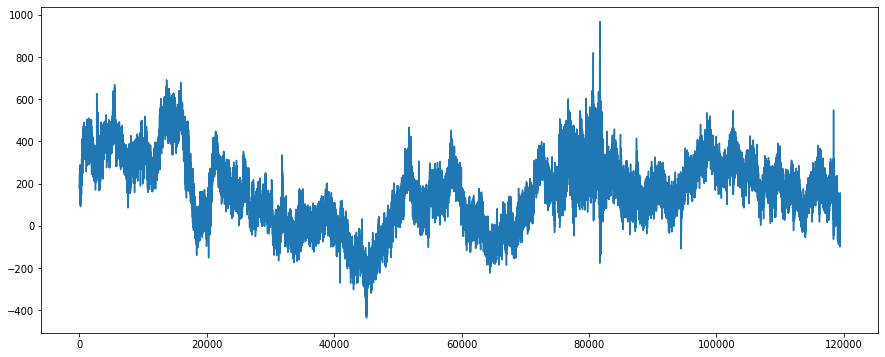

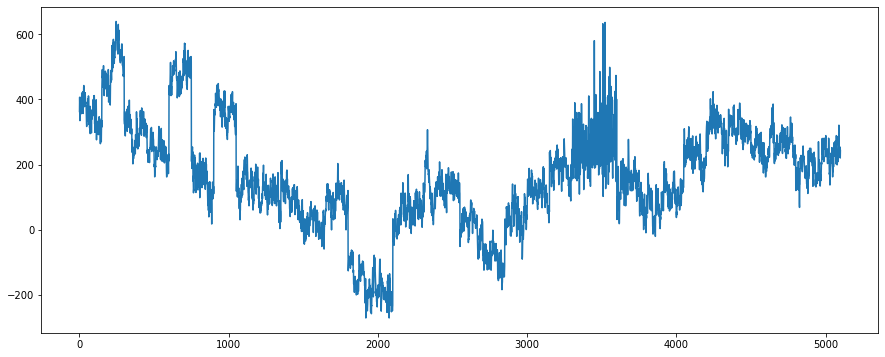

In [ ]:
C3_lo = []
for i in range(119495):
  if LO[i] == 1:
    C3_lo.append(C3[i])
 
print(C3_lo)

fig = plt.figure(figsize=(15, 6))
plt.plot(C3)

fig = plt.figure(figsize=(15, 6))
plt.plot(C3_lo)

<Figure size 1440x432 with 0 Axes>

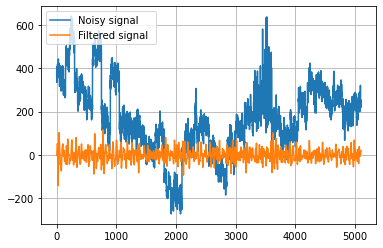

<Figure size 2160x720 with 0 Axes>

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( C3_lo, label='Noisy signal')

y = butter_bandpass_filter(C3_lo, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal ')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal')
plt.show()

In [ ]:
print(len(y))

5100


In [ ]:
from scipy.stats import norm, kurtosis
from scipy.stats import skew
import statistics
import mne
import mne_features

In [ ]:
y = np.array(y)
import statistics

median = np.median(y)
mean = y.mean()
var = statistics.variance(y)
std_dev = var ** 0.5
kurtosis = kurtosis(y)
skewness = skew(y)
peak2peak = max(y)-min(y)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  850.1898950207
median =  -1.0613826042709649
mean =  0.031169975177983516
Standard Deviation =  29.1580159650944
kurtosis =  0.7474546759911651
skewness =  0.10185149372261397
Peak to peak =  257.96491718216066


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y)

0.031169975177983516

In [ ]:
#2.median
median = np.median(y)
median

-1.0613826042709649

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y)

850.1898950207

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y)

29.1580159650944

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y)

3.747454675991165

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y)

0.10185149372261397

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y)

257.96491718216066

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y)

29.155173857946178

In [ ]:
#Freqeuncy Domain
#9.power spectrum density
mne_features.utils.power_spectrum(500,y)

(array([3.35135145e-01, 2.33747334e-01, 1.18212676e+00, 2.97761417e+01,
        8.54535136e+01, 7.49913813e+01, 5.21859745e+01, 4.07220228e+01,
        3.11922395e+01, 1.87898826e+01, 1.89264603e+01, 1.66147184e+01,
        2.38842461e+01, 2.22252271e+01, 1.49901839e+01, 8.10358460e+00,
        6.25000980e+00, 2.72109055e+00, 6.86188223e-01, 2.16926687e-01,
        6.82474119e-02, 4.58496522e-02, 3.80506699e-02, 2.38366438e-02,
        6.17727249e-03, 3.88096602e-03, 3.40084677e-03, 2.11407767e-03,
        1.82650985e-03, 1.32012886e-03, 1.18613897e-03, 8.93634279e-04,
        8.89487043e-04, 8.30149649e-04, 7.17508914e-04, 6.54961413e-04,
        6.87420217e-04, 5.79443919e-04, 5.55719225e-04, 5.45659598e-04,
        5.04109770e-04, 4.78732753e-04, 4.58901762e-04, 4.37211391e-04,
        4.13676587e-04, 3.92229175e-04, 3.78625408e-04, 3.63150367e-04,
        3.48700623e-04, 3.33919107e-04, 3.20366086e-04, 3.10078020e-04,
        2.98696957e-04, 2.87885254e-04, 2.78315675e-04, 2.680603

In [ ]:
import numpy as np
import antropy as ant

#10. Spectral entropy
print(ant.spectral_entropy(y, sf=500, method='welch', normalize=True))

0.5137273481430162


In [ ]:
#11. Approximate entropy
print(ant.app_entropy(y))

0.6134963118331713


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y))
zs = numpy.where(numpy.diff(numpy.sign(y)))[0]
zs

332


array([  17,   30,   54,   85,  112,  117,  127,  157,  168,  178,  195,
        199,  204,  240,  262,  272,  275,  290,  296,  308,  331,  355,
        382,  406,  423,  432,  441,  451,  456,  470,  488,  503,  529,
        556,  587,  606,  616,  630,  656,  673,  677,  692,  717,  729,
        742,  767,  784,  803,  840,  873,  890,  900,  905,  912,  915,
        930,  954,  992, 1014, 1043, 1059, 1066, 1079, 1108, 1140, 1151,
       1154, 1174, 1192, 1200, 1208, 1219, 1230, 1255, 1283, 1307, 1333,
       1334, 1344, 1354, 1365, 1380, 1404, 1416, 1420, 1429, 1434, 1457,
       1474, 1480, 1486, 1518, 1539, 1554, 1564, 1575, 1591, 1601, 1608,
       1617, 1629, 1638, 1646, 1656, 1668, 1682, 1695, 1701, 1710, 1723,
       1732, 1742, 1747, 1752, 1768, 1799, 1808, 1817, 1831, 1853, 1881,
       1900, 1916, 1923, 1941, 1966, 1981, 2003, 2015, 2037, 2065, 2091,
       2097, 2103, 2117, 2131, 2154, 2187, 2215, 2230, 2249, 2264, 2271,
       2279, 2294, 2310, 2319, 2343, 2369, 2404, 24

## **C4 Channel**

[553, 548, 563, 572, 583, 572, 595, 620, 614, 581, 585, 600, 624, 642, 643, 634, 621, 650, 663, 637, 608, 576, 582, 605, 650, 616, 597, 632, 639, 647, 641, 649, 647, 651, 623, 648, 625, 611, 635, 638, 620, 621, 624, 615, 663, 695, 625, 574, 567, 595, 617, 627, 592, 568, 621, 651, 642, 625, 623, 659, 615, 627, 625, 552, 543, 573, 602, 580, 570, 595, 634, 637, 590, 623, 630, 600, 593, 631, 662, 663, 632, 594, 609, 587, 578, 599, 589, 608, 639, 617, 629, 632, 626, 626, 616, 632, 651, 607, 625, 634, 630, 617, 563, 521, 555, 555, 552, 572, 561, 593, 593, 597, 601, 625, 593, 600, 609, 573, 583, 588, 580, 594, 627, 579, 602, 618, 599, 629, 601, 591, 559, 568, 580, 579, 586, 573, 577, 606, 598, 596, 610, 581, 556, 551, 546, 555, 572, 590, 600, 580, 601, 622, 553, 542, 550, 573, 550, 513, 542, 573, 472, 506, 503, 480, 529, 529, 524, 512, 509, 519, 506, 553, 563, 549, 548, 529, 508, 514, 499, 529, 570, 573, 565, 546, 526, 494, 527, 530, 486, 512, 522, 526, 534, 533, 557, 533, 548, 565, 593, 565,

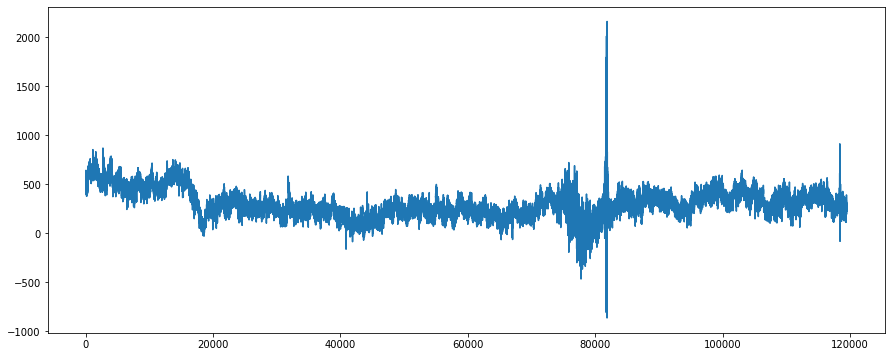

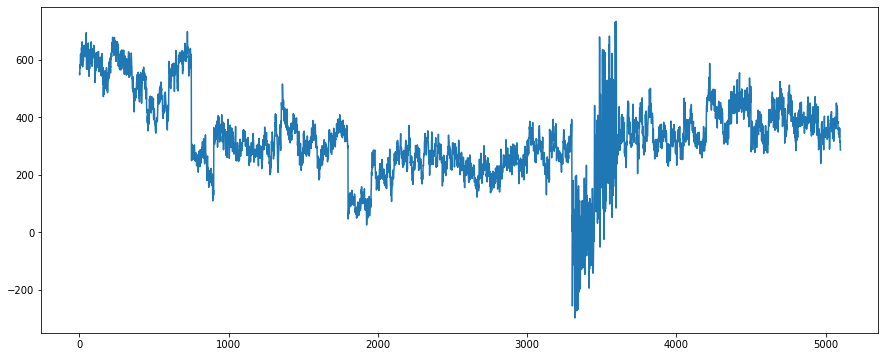

In [ ]:
C4_lo = []
for i in range(119495):
  if LO[i] == 1:
    C4_lo.append(C4[i])
 
print(C4_lo)

fig = plt.figure(figsize=(15, 6))
plt.plot(C4)

fig = plt.figure(figsize=(15, 6))
plt.plot(C4_lo)

<Figure size 1440x432 with 0 Axes>

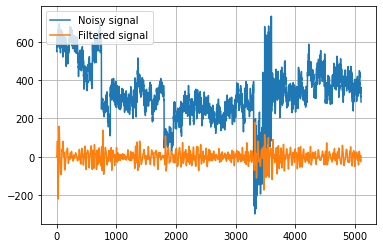

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( C4_lo, label='Noisy signal')

y2 = butter_bandpass_filter(C4_lo, lowcut, highcut, fs, order=6)

plt.plot( y2, label='Filtered signal')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y2))

5100


In [ ]:
y2 = np.array(y2)
import statistics

median = np.median(y2)
mean = y2.mean()
var = statistics.variance(y2)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y2)
peak2peak = max(y2)-min(y2)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1097.625595722668
median =  0.38609849756073106
mean =  -0.03146276295575503
Standard Deviation =  33.13043307478289
kurtosis =  0.7474546759911651
skewness =  -0.14178438963360213
Peak to peak =  400.58964193642123


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y2)

-0.03146276295575503

In [ ]:
#2.median
median = np.median(y2)
median

0.38609849756073106

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y2)

1097.6255957226679

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y2)

33.130433074782886

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y2)

7.069991664579379

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y2)

-0.14178438963360213

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y2)

400.58964193642123

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y2)


33.12719977485385

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y2)

(array([5.26814438e-01, 3.77027881e-01, 1.06349102e+00, 3.19482306e+01,
        1.10026386e+02, 6.43852259e+01, 5.48922886e+01, 2.97645937e+01,
        2.66596834e+01, 4.30882836e+01, 2.75406190e+01, 2.34130336e+01,
        1.40725990e+01, 1.60955082e+01, 1.92244377e+01, 1.55418425e+01,
        9.65406867e+00, 4.19432954e+00, 1.20944056e+00, 2.87426980e-01,
        7.63235641e-02, 2.58563694e-02, 1.29008527e-02, 1.72396318e-02,
        5.16743907e-03, 3.66501109e-03, 3.16480348e-03, 2.22548027e-03,
        1.44517686e-03, 1.68676403e-03, 1.12108162e-03, 9.82830111e-04,
        8.94767109e-04, 9.07305087e-04, 7.21449283e-04, 5.65357039e-04,
        5.94937428e-04, 6.36886094e-04, 4.53439882e-04, 5.06797901e-04,
        4.61537673e-04, 4.31326909e-04, 4.08962865e-04, 3.91460223e-04,
        3.58930659e-04, 3.59395773e-04, 3.21901453e-04, 3.25341215e-04,
        3.01648337e-04, 2.91259632e-04, 2.81428204e-04, 2.68208408e-04,
        2.56926142e-04, 2.47640883e-04, 2.39137336e-04, 2.319039

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y2, sf=500, method='welch', normalize=True))

0.5124829571266973


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y2))

0.5711974174669261


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y2))

zs = numpy.where(numpy.diff(numpy.sign(y2)))[0]
zs

312


array([  17,   31,   54,   83,  126,  153,  187,  209,  210,  223,  234,
        241,  256,  281,  290,  308,  337,  370,  389,  412,  439,  463,
        481,  499,  532,  555,  585,  603,  614,  626,  658,  673,  682,
        693,  719,  747,  758,  767,  780,  804,  836,  868,  892,  905,
        917,  931,  952,  955,  964,  979,  984,  994, 1009, 1019, 1028,
       1043, 1059, 1070, 1080, 1083, 1092, 1102, 1112, 1123, 1144, 1157,
       1159, 1177, 1200, 1231, 1247, 1264, 1285, 1292, 1299, 1315, 1329,
       1338, 1354, 1382, 1407, 1441, 1472, 1479, 1484, 1509, 1517, 1526,
       1544, 1583, 1617, 1644, 1685, 1702, 1724, 1726, 1740, 1767, 1783,
       1795, 1804, 1816, 1829, 1853, 1880, 1914, 1946, 1964, 1971, 1986,
       2012, 2040, 2073, 2100, 2115, 2137, 2150, 2153, 2166, 2179, 2190,
       2209, 2222, 2233, 2254, 2276, 2300, 2311, 2316, 2338, 2369, 2389,
       2397, 2403, 2420, 2433, 2436, 2446, 2457, 2470, 2486, 2495, 2514,
       2532, 2535, 2544, 2557, 2566, 2578, 2595, 26

# **Cz Channel**

[78, 103, 90, 80, 110, 113, 122, 104, 101, 111, 100, 99, 110, 129, 120, 111, 98, 100, 89, 98, 111, 70, 71, 82, 102, 86, 97, 128, 118, 116, 95, 101, 103, 86, 77, 88, 51, 70, 78, 82, 76, 86, 77, 63, 68, 81, 56, 71, 70, 86, 82, 84, 93, 104, 100, 87, 93, 86, 89, 70, 77, 111, 88, 73, 58, 56, 68, 92, 93, 99, 109, 94, 69, 84, 83, 92, 89, 86, 95, 91, 78, 91, 102, 95, 96, 105, 111, 123, 126, 109, 87, 65, 94, 107, 95, 110, 115, 99, 117, 140, 123, 108, 83, 50, 69, 50, 51, 69, 100, 100, 108, 99, 106, 104, 86, 93, 99, 89, 94, 77, 68, 67, 86, 84, 79, 68, 65, 81, 51, 44, 46, 69, 75, 79, 104, 93, 85, 119, 111, 82, 63, 71, 61, 46, 58, 63, 56, 74, 72, 57, 88, 75, 55, 51, 46, 41, 29, 1, 9, 40, 30, 37, 9, -15, -1, 6, 32, 21, 42, 39, 40, 63, 65, 72, 45, 48, 30, 26, 47, 58, 71, 78, 72, 39, 12, 22, 31, 24, 20, 42, 46, 43, 65, 72, 78, 36, 39, 27, 49, 61, 50, 28, 38, 52, 36, 40, 38, 43, 70, 75, 58, 82, 88, 87, 99, 95, 94, 113, 122, 111, 102, 117, 129, 111, 145, 155, 120, 140, 135, 138, 132, 104, 139, 133, 136,

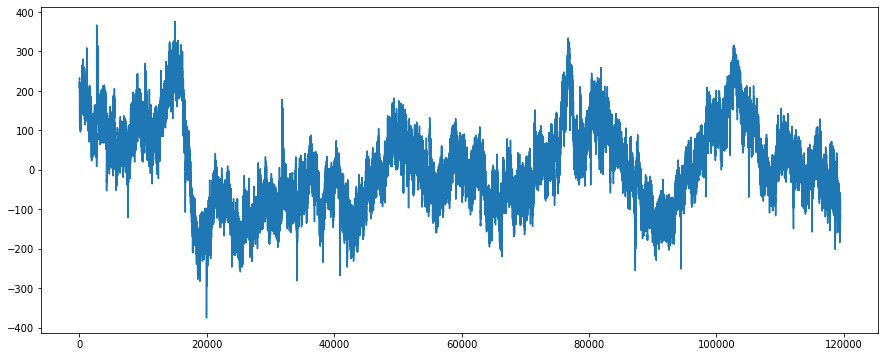

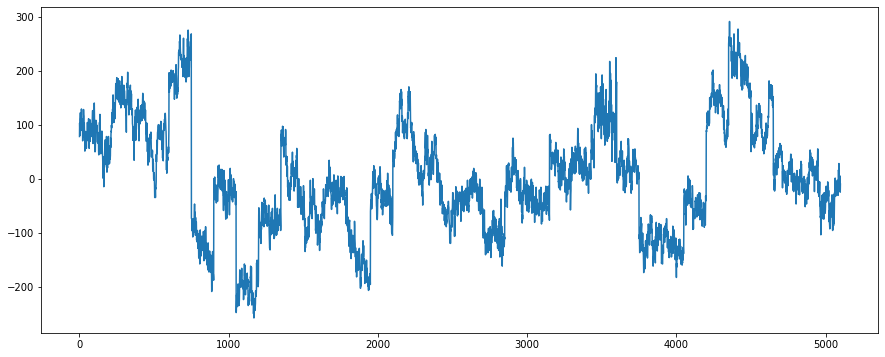

In [ ]:
Cz_lo = []
for i in range(119495):
  if LO[i] == 1:
    Cz_lo.append(Cz[i])
 
print(Cz_lo)

fig = plt.figure(figsize=(15, 6))
plt.plot(Cz)

fig = plt.figure(figsize=(15, 6))
plt.plot(Cz_lo)

<Figure size 1440x432 with 0 Axes>

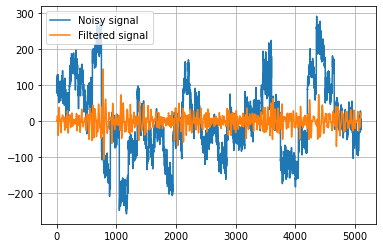

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( Cz_lo, label='Noisy signal')

y3 = butter_bandpass_filter(Cz_lo, lowcut, highcut, fs, order=6)

plt.plot( y3, label='Filtered signal')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y3))

5100


In [ ]:
y3 = np.array(y3)
import statistics

median = np.median(y3)
mean = y3.mean()
var = statistics.variance(y3)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y3)
peak2peak = max(y3)-min(y3)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  454.9304118481456
median =  0.3782767111997831
mean =  0.004578099249644978
Standard Deviation =  21.32909777388968
kurtosis =  0.7474546759911651
skewness =  0.12411237684264727
Peak to peak =  251.06039299554743


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y3)

0.004578099249644978

In [ ]:
#2.median
median = np.median(y3)
median

0.3782767111997831

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y3)

454.9304118481455

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y3)

21.329097773889675

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y3)

5.836628705757361

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y3)

0.12411237684264727

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y3)

251.06039299554743

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y3)

21.327007074730375

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y3)

(array([1.49265437e-01, 1.17653809e-01, 5.41156385e-01, 1.52572061e+01,
        5.24861967e+01, 3.40684648e+01, 2.82056389e+01, 2.02141546e+01,
        1.75049428e+01, 1.20057291e+01, 1.16834337e+01, 1.03116228e+01,
        6.65288924e+00, 6.41358477e+00, 3.70073330e+00, 2.25219246e+00,
        2.17983515e+00, 6.07136288e-01, 2.39839373e-01, 1.30802916e-01,
        4.30051589e-02, 8.81800580e-03, 7.62108600e-03, 3.38977944e-03,
        2.08909853e-03, 2.10085164e-03, 1.47726240e-03, 6.61075385e-04,
        7.02460302e-04, 4.70057896e-04, 4.89290641e-04, 3.86083050e-04,
        3.56950741e-04, 3.60908977e-04, 3.08726853e-04, 2.67424336e-04,
        2.80236907e-04, 2.46894428e-04, 2.26342139e-04, 2.23333337e-04,
        2.08617790e-04, 1.95598520e-04, 1.87719624e-04, 1.74438252e-04,
        1.69974801e-04, 1.58906863e-04, 1.52973729e-04, 1.46359038e-04,
        1.40073319e-04, 1.33908132e-04, 1.28711217e-04, 1.23790182e-04,
        1.19200868e-04, 1.14866731e-04, 1.10518096e-04, 1.070967

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y3, sf=500, method='welch', normalize=True))

0.49675728550248127


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y3))

0.5872587592469496


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y))

zs = numpy.where(numpy.diff(numpy.sign(y3)))[0]
zs

332


array([  17,   31,   59,   81,  114,  118,  128,  142,  149,  160,  186,
        202,  212,  215,  229,  246,  262,  275,  284,  294,  299,  310,
        320,  322,  336,  347,  356,  366,  385,  409,  427,  461,  485,
        501,  530,  549,  580,  599,  615,  630,  658,  675,  678,  692,
        715,  750,  759,  766,  781,  805,  832,  869,  915,  931,  950,
        979,  986,  994, 1010, 1021, 1028, 1037, 1047, 1066, 1080, 1103,
       1127, 1171, 1196, 1213, 1217, 1228, 1242, 1246, 1256, 1271, 1277,
       1287, 1300, 1314, 1327, 1335, 1345, 1356, 1366, 1380, 1404, 1444,
       1468, 1481, 1486, 1511, 1540, 1570, 1605, 1629, 1669, 1701, 1716,
       1730, 1749, 1757, 1766, 1779, 1793, 1794, 1809, 1818, 1822, 1835,
       1845, 1850, 1859, 1867, 1880, 1899, 1909, 1922, 1940, 1952, 1964,
       1980, 2013, 2037, 2070, 2093, 2117, 2131, 2162, 2180, 2198, 2208,
       2218, 2231, 2252, 2283, 2303, 2311, 2320, 2342, 2367, 2387, 2396,
       2405, 2423, 2452, 2483, 2496, 2508, 2526, 25

## **P3 Channel**

[371, 404, 411, 417, 457, 467, 477, 461, 449, 463, 469, 476, 529, 538, 542, 559, 517, 529, 508, 520, 563, 523, 475, 471, 509, 531, 537, 558, 578, 547, 534, 550, 525, 518, 499, 507, 502, 515, 504, 485, 477, 483, 489, 461, 467, 447, 431, 430, 423, 409, 435, 436, 463, 463, 464, 460, 476, 521, 551, 527, 542, 549, 507, 481, 460, 442, 449, 425, 423, 466, 497, 486, 439, 464, 489, 477, 488, 504, 460, 432, 389, 430, 452, 453, 453, 488, 489, 498, 479, 515, 505, 464, 464, 473, 484, 487, 483, 471, 474, 491, 429, 346, 356, 316, 350, 381, 398, 451, 502, 454, 442, 475, 473, 465, 400, 384, 370, 344, 350, 335, 337, 347, 391, 399, 378, 366, 351, 351, 296, 303, 334, 332, 342, 355, 366, 393, 392, 408, 385, 344, 318, 351, 362, 337, 375, 390, 350, 350, 360, 322, 405, 440, 438, 463, 443, 446, 422, 423, 410, 460, 464, 471, 435, 388, 372, 397, 409, 402, 422, 381, 367, 398, 428, 453, 430, 377, 367, 371, 363, 394, 405, 376, 317, 296, 279, 288, 260, 281, 274, 277, 285, 270, 311, 305, 341, 309, 275, 289, 317, 383,

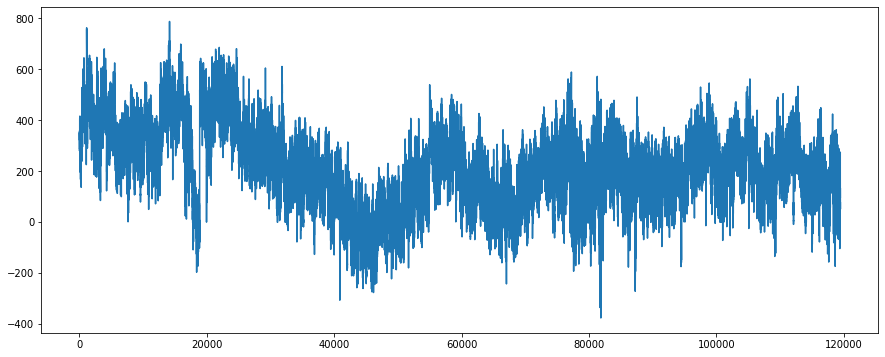

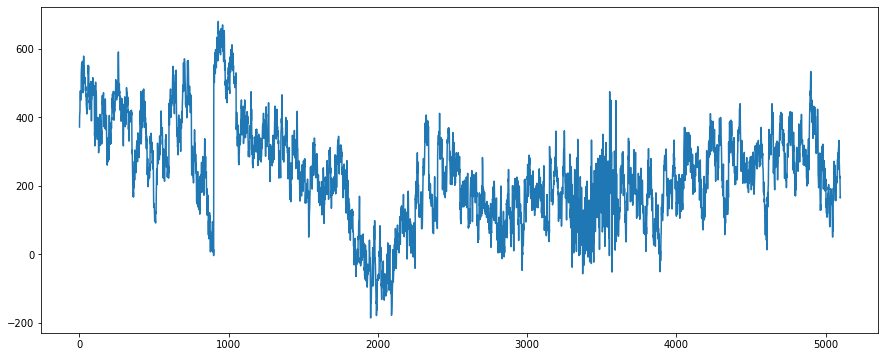

In [ ]:
P3_lo = []
for i in range(119495):
  if LO[i] == 1:
    P3_lo.append(P3[i])
 
print(P3_lo)

fig = plt.figure(figsize=(15, 6))
plt.plot(P3)

fig = plt.figure(figsize=(15, 6))
plt.plot(P3_lo)

<Figure size 1440x432 with 0 Axes>

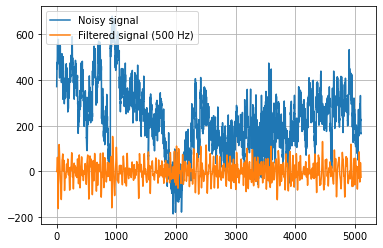

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( P3_lo, label='Noisy signal')

y4 = butter_bandpass_filter(P3_lo, lowcut, highcut, fs, order=6)

plt.plot( y4, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y4))

5100


In [ ]:
y4 = np.array(y4)
import statistics

median = np.median(y4)
mean = y4.mean()
var = statistics.variance(y4)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y4)
peak2peak = max(y4)-min(y4)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1812.4356632462786
median =  -0.37590233758381897
mean =  0.04095943605840721
Standard Deviation =  42.57271031125783
kurtosis =  0.7474546759911651
skewness =  -0.025042634598977005
Peak to peak =  315.60400549103315


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y4)

0.04095943605840721

In [ ]:
#2.median
median = np.median(y4)
median

-0.37590233758381897

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y4)

1812.4356632462789

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y4)

42.57271031125783

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y4)

3.2941239590405584

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y4)

-0.025042634598977005

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y4)

315.60400549103315

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y4)

42.56855601708693

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y4)

(array([8.81522480e-01, 5.57966589e-01, 2.46720900e+00, 8.25271269e+01,
        1.91734211e+02, 1.37648509e+02, 9.58409356e+01, 7.40323501e+01,
        7.88862577e+01, 6.25758644e+01, 4.57222968e+01, 4.59843209e+01,
        4.38864643e+01, 2.71754280e+01, 2.01340718e+01, 1.27864680e+01,
        8.00405871e+00, 3.69945382e+00, 1.50237157e+00, 5.60487757e-01,
        2.31402015e-01, 1.03814773e-01, 3.73594813e-02, 2.64559208e-02,
        1.17364009e-02, 7.65554170e-03, 6.65921802e-03, 4.24979500e-03,
        3.48206191e-03, 2.74460879e-03, 2.33365965e-03, 2.35649679e-03,
        1.98298703e-03, 1.85810602e-03, 1.84556496e-03, 1.60584332e-03,
        1.59470335e-03, 1.44274964e-03, 1.33950309e-03, 1.32452657e-03,
        1.22273160e-03, 1.18144276e-03, 1.11107138e-03, 1.07770187e-03,
        1.02036858e-03, 9.66498061e-04, 9.36980477e-04, 8.89907887e-04,
        8.62269342e-04, 8.24106229e-04, 7.94130001e-04, 7.68571209e-04,
        7.38926446e-04, 7.12906500e-04, 6.91331514e-04, 6.656995

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y4, sf=500, method='welch', normalize=True))

0.4970349866844252


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y4))

0.6075260707161063


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y4))

zs = numpy.where(numpy.diff(numpy.sign(y4)))[0]
zs

309


array([  17,   31,   56,   85,  125,  159,  174,  176,  193,  200,  208,
        227,  260,  287,  302,  307,  317,  326,  333,  342,  356,  371,
        384,  404,  426,  435,  439,  467,  485,  503,  528,  549,  586,
        606,  619,  629,  646,  647,  658,  672,  680,  693,  719,  722,
        739,  767,  784,  799,  815,  842,  858,  866,  882,  907,  918,
        930,  953,  983, 1011, 1043, 1061, 1068, 1081, 1107, 1136, 1151,
       1159, 1173, 1193, 1211, 1219, 1231, 1241, 1255, 1280, 1292, 1301,
       1317, 1324, 1333, 1362, 1381, 1406, 1409, 1421, 1432, 1433, 1454,
       1476, 1482, 1490, 1519, 1544, 1553, 1560, 1576, 1609, 1652, 1673,
       1685, 1688, 1702, 1714, 1736, 1747, 1754, 1767, 1779, 1787, 1801,
       1810, 1818, 1839, 1854, 1864, 1872, 1881, 1897, 1915, 1944, 1954,
       1965, 1979, 2001, 2015, 2038, 2053, 2059, 2064, 2088, 2116, 2138,
       2165, 2186, 2201, 2208, 2218, 2229, 2267, 2286, 2304, 2334, 2369,
       2401, 2420, 2432, 2444, 2448, 2453, 2491, 25

## **P4 Channel**

[388, 423, 412, 434, 477, 534, 533, 519, 508, 474, 487, 499, 514, 511, 539, 552, 541, 544, 540, 534, 572, 526, 472, 486, 567, 562, 515, 550, 562, 527, 488, 528, 519, 535, 518, 506, 473, 483, 481, 493, 490, 500, 524, 509, 511, 502, 469, 455, 422, 442, 445, 464, 513, 517, 538, 521, 485, 501, 532, 580, 541, 545, 548, 504, 480, 481, 497, 489, 482, 479, 506, 480, 412, 468, 462, 415, 398, 461, 465, 490, 419, 406, 469, 443, 432, 471, 455, 464, 487, 443, 444, 415, 407, 431, 459, 474, 497, 460, 447, 471, 449, 390, 321, 258, 318, 335, 326, 383, 392, 401, 420, 431, 457, 467, 358, 339, 327, 300, 322, 335, 321, 296, 374, 380, 350, 372, 338, 332, 295, 306, 286, 326, 335, 354, 364, 300, 305, 341, 313, 313, 305, 321, 297, 286, 299, 310, 335, 373, 400, 333, 595, 591, 550, 556, 582, 611, 564, 563, 551, 598, 558, 534, 497, 455, 434, 446, 455, 428, 451, 441, 434, 468, 467, 439, 450, 443, 380, 397, 397, 408, 452, 441, 418, 439, 413, 409, 379, 413, 419, 428, 432, 477, 493, 448, 476, 469, 480, 465, 494, 508,

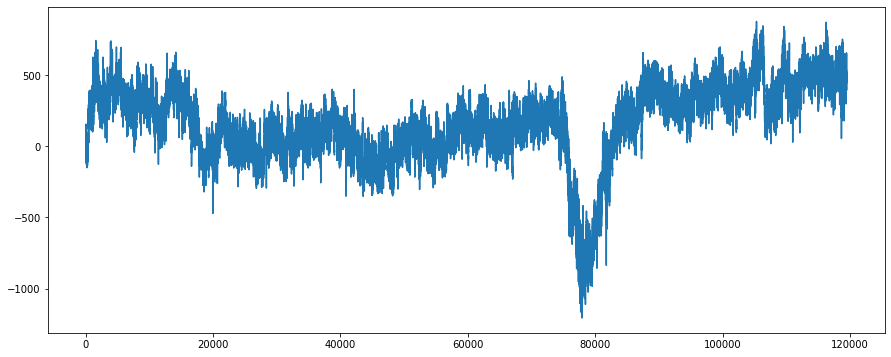

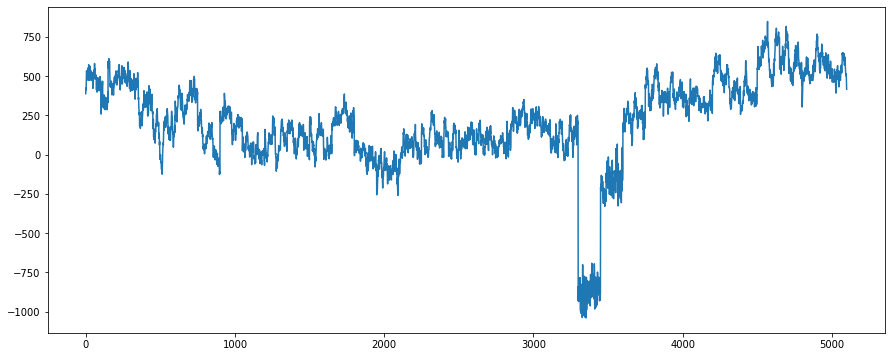

In [ ]:
P4_lo = []
for i in range(119495):
  if LO[i] == 1:
    P4_lo.append(P4[i])
 
print(P4_lo)

fig = plt.figure(figsize=(15, 6))
plt.plot(P4)

fig = plt.figure(figsize=(15, 6))
plt.plot(P4_lo)

<Figure size 1440x432 with 0 Axes>

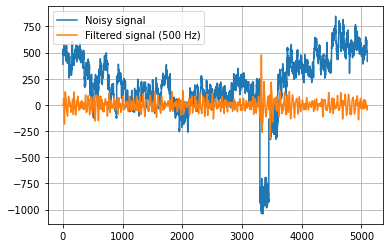

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( P4_lo, label='Noisy signal')

y5 = butter_bandpass_filter(P4_lo, lowcut, highcut, fs, order=6)

plt.plot( y5, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y5))

5100


In [ ]:
y5 = np.array(y5)
import statistics

median = np.median(y5)
mean = y5.mean()
var = statistics.variance(y5)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y5)
peak2peak = max(y5)-min(y5)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  3274.7817064352766
median =  0.25824935996845744
mean =  -0.058856342171867894
Standard Deviation =  57.22570843978497
kurtosis =  0.7474546759911651
skewness =  0.37614248836385167
Peak to peak =  793.9349052966987


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y5)

-0.058856342171867894

In [ ]:
#2.median
median = np.median(y5)
median

0.25824935996845744

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y5)

3274.7817064352766

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y5)

57.22570843978497

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y5)

8.67315001183777

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y5)

0.37614248836385167

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y5)

793.9349052966987

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y5)

57.220128070847636

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y5)

(array([3.03476481e+00, 2.38514322e+00, 2.77979961e+00, 1.13286075e+02,
        3.66990596e+02, 2.55845895e+02, 1.48585353e+02, 1.33069598e+02,
        9.80203629e+01, 7.35572117e+01, 7.46742615e+01, 7.03058171e+01,
        5.02634645e+01, 4.31662878e+01, 3.34751075e+01, 1.95113383e+01,
        7.26336748e+00, 4.04872094e+00, 1.12690267e+00, 4.57019921e-01,
        2.85644285e-01, 1.44847731e-01, 5.25031256e-02, 4.39037206e-02,
        1.89090931e-02, 2.47521627e-02, 1.54481658e-02, 1.65851169e-02,
        1.28314975e-02, 1.15274201e-02, 1.01846419e-02, 1.00299840e-02,
        8.69812259e-03, 8.07120716e-03, 7.36179876e-03, 7.41124781e-03,
        6.33397039e-03, 6.43326327e-03, 5.77031703e-03, 5.55316240e-03,
        5.26732570e-03, 5.01147046e-03, 4.69471399e-03, 4.51802129e-03,
        4.28601497e-03, 4.09489947e-03, 3.91106354e-03, 3.74837273e-03,
        3.60419138e-03, 3.44813896e-03, 3.32402264e-03, 3.19262041e-03,
        3.08001999e-03, 2.96575444e-03, 2.86860376e-03, 2.766370

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y5, sf=500, method='welch', normalize=True))

0.48220504882481


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y5))

0.5659011693712386


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y5))

zs = numpy.where(numpy.diff(numpy.sign(y5)))[0]
zs

281


array([  17,   31,   56,   85,  112,  118,  126,  154,  167,  178,  198,
        224,  257,  284,  298,  308,  332,  347,  357,  370,  387,  413,
        440,  467,  484,  502,  528,  550,  582,  603,  615,  624,  639,
        650,  661,  673,  678,  692,  735,  751,  759,  766,  781,  797,
        815,  843,  860,  868,  878,  901,  918,  930,  948,  957,  963,
        985, 1009, 1022, 1026, 1041, 1060, 1067, 1080, 1104, 1125, 1147,
       1159, 1174, 1197, 1227, 1241, 1254, 1269, 1283, 1302, 1323, 1324,
       1333, 1355, 1383, 1419, 1452, 1484, 1508, 1518, 1528, 1546, 1577,
       1607, 1644, 1670, 1683, 1689, 1700, 1710, 1724, 1732, 1737, 1748,
       1755, 1778, 1800, 1809, 1817, 1831, 1855, 1877, 1885, 1907, 1929,
       1954, 1967, 1976, 1997, 2015, 2040, 2053, 2063, 2076, 2088, 2114,
       2136, 2166, 2196, 2199, 2207, 2220, 2231, 2244, 2280, 2301, 2336,
       2366, 2392, 2419, 2432, 2444, 2447, 2456, 2490, 2513, 2532, 2535,
       2545, 2574, 2608, 2634, 2648, 2654, 2663, 26

## **Pz Channel**

[392, 436, 431, 465, 478, 510, 529, 515, 481, 485, 481, 492, 515, 542, 540, 530, 521, 515, 490, 500, 533, 480, 427, 443, 481, 501, 495, 523, 531, 521, 485, 501, 501, 491, 472, 472, 451, 444, 454, 451, 440, 448, 455, 442, 447, 435, 418, 418, 415, 418, 437, 449, 482, 482, 498, 485, 486, 501, 538, 530, 533, 538, 505, 478, 452, 447, 460, 445, 462, 485, 492, 489, 453, 470, 479, 461, 455, 500, 488, 468, 424, 437, 472, 465, 456, 480, 480, 488, 501, 502, 479, 437, 428, 448, 448, 469, 483, 467, 463, 452, 436, 370, 336, 305, 348, 336, 362, 415, 429, 421, 437, 444, 446, 445, 366, 343, 339, 316, 317, 304, 300, 308, 359, 379, 365, 340, 345, 350, 301, 299, 319, 326, 340, 356, 360, 353, 358, 385, 341, 319, 308, 347, 336, 302, 311, 316, 317, 319, 341, 316, 459, 456, 446, 456, 436, 438, 417, 388, 374, 406, 398, 372, 340, 315, 288, 289, 321, 301, 317, 306, 300, 317, 356, 358, 346, 344, 310, 297, 296, 313, 370, 364, 333, 323, 293, 296, 270, 288, 286, 302, 320, 311, 336, 326, 329, 314, 326, 328, 355, 391,

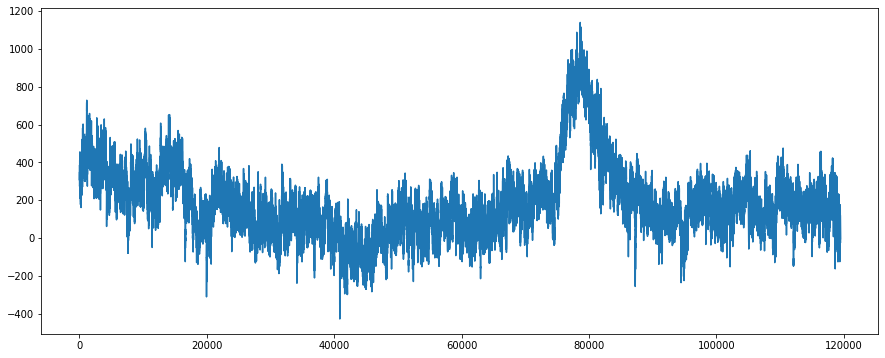

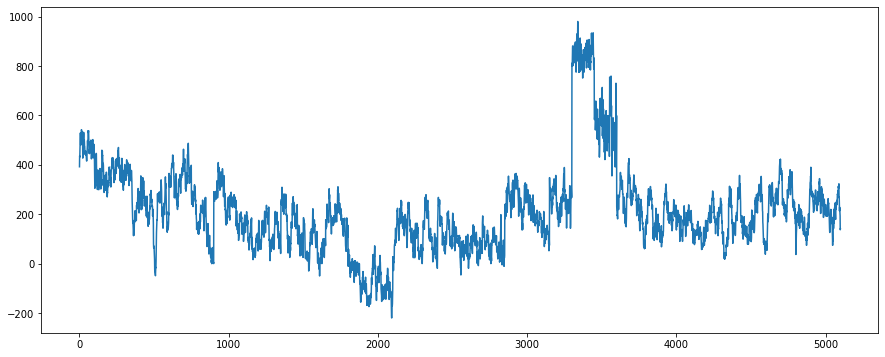

In [ ]:
Pz_lo = []
for i in range(119495):
  if LO[i] == 1:
    Pz_lo.append(Pz[i])
 
print(Pz_lo)

fig = plt.figure(figsize=(15, 6))
plt.plot(Pz)

fig = plt.figure(figsize=(15, 6))
plt.plot(Pz_lo)

<Figure size 1440x432 with 0 Axes>

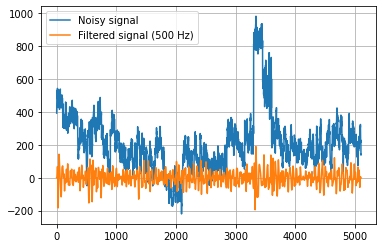

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( Pz_lo, label='Noisy signal')

y6 = butter_bandpass_filter(Pz_lo, lowcut, highcut, fs, order=6)

plt.plot( y6, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y6))

5100


In [ ]:
y6 = np.array(y6)
import statistics

median = np.median(y6)
mean = y6.mean()
var = statistics.variance(y6)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y6)
peak2peak = max(y6)-min(y6)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1984.8931241270661
median =  -1.0616143285432598
mean =  -0.028252306693567583
Standard Deviation =  44.5521393888898
kurtosis =  0.7474546759911651
skewness =  -0.044517863713225546
Peak to peak =  383.9304204313305


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y6)

-0.028252306693567583

In [ ]:
#2.median
median = np.median(y6)
median

-1.0616143285432598

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y6)

1984.8931241270661

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y6)

44.5521393888898

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y6)

3.8908566214139286

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y6)

-0.044517863713225546

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y6)

383.9304204313305

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y6)

44.54778027679582

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y6)

(array([8.31500605e-01, 5.85536012e-01, 2.27989094e+00, 8.11153817e+01,
        2.64836106e+02, 1.70741344e+02, 1.05469624e+02, 4.84378875e+01,
        5.59021799e+01, 5.49309506e+01, 4.90579638e+01, 3.87828363e+01,
        3.70143708e+01, 2.10749899e+01, 1.35227223e+01, 9.56903631e+00,
        4.88118271e+00, 2.36610873e+00, 9.11493181e-01, 4.98156614e-01,
        1.38370073e-01, 3.62494861e-02, 2.06088688e-02, 1.76503775e-02,
        1.05886641e-02, 7.37222248e-03, 6.95531115e-03, 3.77066739e-03,
        4.09003269e-03, 3.87827262e-03, 3.28973160e-03, 3.15065440e-03,
        2.64149178e-03, 2.80714358e-03, 2.33417278e-03, 2.17141338e-03,
        2.21635737e-03, 1.97791705e-03, 1.86434469e-03, 1.84993909e-03,
        1.67010958e-03, 1.62305845e-03, 1.54308155e-03, 1.47234250e-03,
        1.40059929e-03, 1.34853913e-03, 1.28198425e-03, 1.23651153e-03,
        1.18812202e-03, 1.14244260e-03, 1.09869655e-03, 1.05758212e-03,
        1.02065102e-03, 9.85652551e-04, 9.51544230e-04, 9.231640

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y6, sf=500, method='welch', normalize=True))

0.4790800882461465


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y6))

0.5847192630991569


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y6))

zs = numpy.where(numpy.diff(numpy.sign(y6)))[0]
zs

277


array([  17,   31,   55,   84,  124,  156,  169,  177,  191,  224,  258,
        284,  301,  309,  318,  329,  334,  344,  356,  371,  385,  410,
        428,  432,  440,  472,  488,  502,  529,  549,  581,  602,  617,
        628,  642,  645,  660,  692,  718,  725,  736,  752,  782,  799,
        812,  838,  858,  868,  877,  898,  917,  930,  948,  983, 1008,
       1022, 1030, 1038, 1050, 1070, 1087, 1104, 1124, 1147, 1160, 1174,
       1197, 1212, 1221, 1224, 1238, 1252, 1259, 1261, 1271, 1277, 1301,
       1319, 1327, 1335, 1363, 1382, 1418, 1450, 1473, 1511, 1521, 1526,
       1543, 1574, 1607, 1643, 1670, 1700, 1713, 1737, 1749, 1755, 1769,
       1799, 1810, 1818, 1834, 1855, 1864, 1869, 1883, 1895, 1909, 1926,
       1954, 1988, 2014, 2038, 2061, 2088, 2100, 2105, 2116, 2133, 2164,
       2183, 2200, 2207, 2219, 2230, 2245, 2282, 2302, 2335, 2367, 2403,
       2419, 2432, 2455, 2489, 2512, 2532, 2539, 2546, 2562, 2566, 2578,
       2595, 2597, 2608, 2634, 2648, 2655, 2663, 26